# Градиентный спуск

In [18]:
import random
import matplotlib.pyplot as plt
import numpy as np

Сгенерируем выборку для задачи регрессии и визуализируем данные

(100,)
(100, 1)


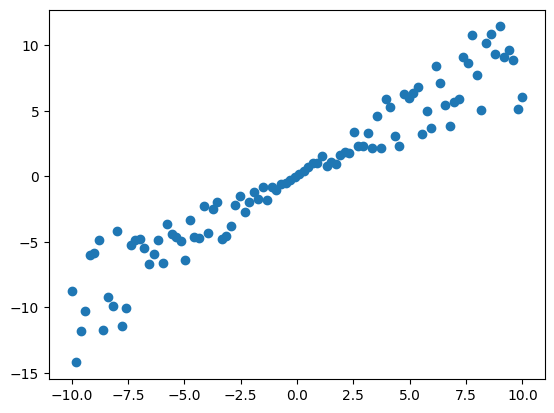

In [19]:
np.random.seed(42)

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y);

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [20]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \eta\nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

## Задание 1

Добавьте в функцию градиентного спуска из семинара L2-регуляризацию.

В этом случае градиент будет считаться по формуле

$$\nabla_w Q(w)=\frac2m (X^T(Xw-y)+\lambda w).$$

Добавьте в функцию `gradient_descent` гиперпараметр `lambda_`, задайте его по умолчанию равным нулю.

In [21]:
def gradient_descent(X, y, learning_rate, iterations, lambda_ = 0) -> np.array:

  X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем константный признак (столбец из 1)
  w = np.random.rand(X.shape[1]) # инициализируем веса
  m = X.shape[0] # число объектов
  errors = [] #  MSE

  for i in range(iterations):
    gradient = 2 / m * (X.T @ (X @ w - y) + lambda_ * w)
    param = w - learning_rate * gradient
    iter_error = compute_cost(X, y, w)
    errors.append(iter_error)
    w = param

  return w, errors


In [22]:
#https://medium.com/@lachlanmiller_52885/understanding-and-calculating-the-cost-function-for-linear-regression-39b8a3519fcb

## Задание 2

Модифицируйте функцию из задания 1 так, чтобы она осуществляла стохастический градиентный спуск - назовите новую функцию `stochastic_gradient_descent` (она также должна учитывать регуляризацию).

* в стохастическом градиентном спуске на каждой итерации метода мы выбираем случайный объект - пусть это будет индекс случайного объекта `ind`

* затем применяем обычный градиентный спуск, но с условием, что градиент считается не по всем объектам, а только по объекту с индексом `ind`, поэтому в формуле для обновления весов должно произойти два изменения:
  - мы обращаемся не ко всей матрице `X`, а только к одному объекту.

  **Подсказка:** чтобы матричная запись не поменялась, мы можем объявить новую матрицу `X_ind = X[ind, :].reshape(-1,1)` и работать с ней.
  - при вычислении градиента по одному объекту делить результат на число объектов `m` не требуется.

In [30]:
def stochastic_gradient_descent(X: np.array, y: np.array, learning_rate: float, iterations: int, lambda_=0.0):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.rand(X.shape[1]) #.reshape(-1, 1)
    errors = []

    for i in range(0, iterations):
        ind = np.random.randint(X.shape[0])
        random_object_X = X[ind, :].reshape(1,-1)
        random_object_y = y[ind]

        grad_mse = 2*(random_object_X.T @ (random_object_X @ w - random_object_y) + lambda_*w)

        w -= learning_rate*grad_mse
        errors.append(compute_cost(X, y, w))

    return w, errors

Создадим функцию для получения предсказания модели

In [31]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

## Вопрос 1

Примените функцию `gradient_descent` без регуляризации, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [62]:
# your code here

w, gd_costs = gradient_descent(X, y, learning_rate=0.01, iterations=100, lambda_=0.0)
w

array([0.10219498, 0.96568968])

## Вопрос 2

Примените функцию `gradient_descent` с коэффициентом регуляризации 1000, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [63]:
# your code here
w, _ = gradient_descent(X, y, learning_rate=0.01, iterations=100, lambda_=1000)
w

array([0.00316762, 0.74624834])

## Вопрос 3

Примените функцию `stochastic_gradient_descent` без регуляризации, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [64]:
np.random.seed(42)

# your code here
w_st, sgd_costs = stochastic_gradient_descent(X, y, learning_rate=0.001, iterations=100)
w_st

array([0.27882166, 1.00181914])

## Вопрос 4

Примените функцию `stochastic_gradient_descent` с коэффициентом регуляризации 100, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [65]:
np.random.seed(42)

# your code here

w_st, _ = stochastic_gradient_descent(X, y, learning_rate=0.001, iterations=100, lambda_=100)
w_st

array([0.01572833, 0.24921064])

## Вопрос 5

Нарисуйте ошибку в зависимости от номера итерации для GD и SGD на одной картинке. Используйте для обучения в обоих случаях `learning_rate=0.001, iterations=100, lambda_=0.`

Можно ли сказать, что оба графика монотонно убывают?

In [66]:
# your code here
#cost_array = np.array((np.arange(1, 100), gd_costs, sgd_costs))

In [67]:
nmb = np.arange(0, 100)
gd = np.array(gd_costs)
sgd = np.array(sgd_costs)

In [68]:
nmb.shape, gd.shape, sgd.shape

((100,), (100,), (100,))

Text(0, 0.5, 'Errors')

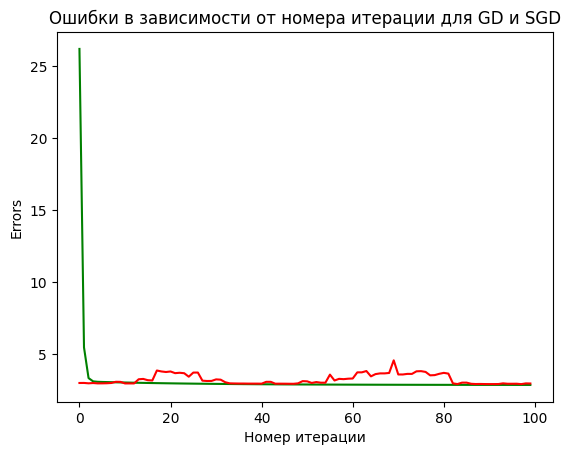

In [69]:
fig, ax = plt.subplots()
ax.plot(nmb, gd, color='green')
ax.plot(nmb, sgd, color='red')
ax.set_title('Oшибки в зависимости от номера итерации для GD и SGD')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Errors')


## Задание (бонус, без проверки)

Реализуйте стохастический градиентный спуск с регуляризацией в виде класса. Протестируйте его.

In [ ]:
class StochasticGradientDescent:
    """
    Класс реализующий стохастический градиентный спуск с регуляризацией
    """

    def __init__(self) -> None:
        self.weights = None  # веса модели
        self.errors = None  # массив ошибок при обучении

    @staticmethod
    def compute_cost(X: np.array, y: np.array, theta: np.array) -> float:
        m = len(y)
        cost = (1. / m) * (np.linalg.norm(X @ theta - y) ** 2)
        return cost

    def fit(self, X: np.array, y: np.array, learning_rate: float, iterations: int, reg_coef: float = 0.0) -> None:
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # добавляем константный признак (столбец из 1)
        params = np.random.rand(X.shape[1])  # инициализируем веса
        m = X.shape[0]  # число объектов
        cost_track = np.zeros((iterations, 1))  # массив с ошибками (MSE)
        for i in range(iterations):
            ind = np.random.randint(low=0, high=m)  # генерируем случайный признак
            X_ind = X[ind, :].reshape(-1, 1)
            params = params - 2 * learning_rate * (X_ind @ ((X_ind.T @ params) - y[ind]) + reg_coef * params)
            cost_track[i] = self.compute_cost(X, y, params)
        self.weights = params
        self.errors = cost_track

    def predict(self, X: np.array) -> np.array:
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.weights